In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from dateutil.relativedelta import relativedelta
from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

In [2]:
dtypes = {'Year': 'int32', 'Month': 'int32', 'DayofMonth': 'int32', 'DayOfWeek': 'int32', 'DepTime': 'float32', 
          'CRSDepTime': 'int32', 'ArrTime': 'float32', 'CRSArrTime': 'int32', 'UniqueCarrier': 'str', 
          'FlightNum': 'int32', 'TailNum': 'str', 'ActualElapsedTime': 'float32', 'CRSElapsedTime': 'float32',
          'AirTime': 'float32', 'ArrDelay': 'float32', 'DepDelay': 'float32', 'Origin': 'str', 'Dest': 'str',
          'Distance': 'int32', 'TaxiIn': 'float32', 'TaxiOut': 'float32', 'Cancelled': 'int32',
          'CancellationCode': 'str', 'Diverted': 'int32', 'CarrierDelay': 'float32', 'WeatherDelay': 'float32', 
          'NASDelay': 'float32', 'SecurityDelay': 'float32', 'LateAircraftDelay': 'float32'}
df_all = pd.concat([pd.read_csv('input/2007.csv', dtype=dtypes), 
                    pd.read_csv('input/2008.csv', dtype=dtypes)])
df_airports = pd.read_csv('input/airports.csv')
df_all = df_all.merge(right=df_airports,how='left', left_on='Origin', right_on='iata')
df_all = df_all.merge(right=df_airports,how='left', left_on='Dest', right_on='iata')
df = df_all[df_all['UniqueCarrier']=='WN']

In [4]:
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    df.loc[df['CancellationCode'] == 'A', 'CarrierCancelation'] = 1
    df.loc[df['CancellationCode'] == 'B', 'WeatherCancelation'] = 1
    df.loc[df['CancellationCode'] == 'C', 'NasCancelation'] = 1
    df.loc[df['CancellationCode'] == 'D', 'SecurityCancelation'] = 1
df['lon-lat'] = df[['long_x', 'lat_x']].apply(tuple, axis=1)
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')
df.index = df['DepDate']

/home/zibski/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/zibski/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/zibski/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [5]:
def univariate(df):

    
    categorical_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
                           'UniqueCarrier', 'TailNum', 'FlightNum',
                           'Origin', 'Dest', 'CancellationCode']
    
    for col in df.columns:
        if col in categorical_columns:
            pass
        else:
            fig = plt.figure(figsize=(16, 5))
            ax = plt.axes()
            plt.hold(True)

            bp = sns.boxplot(y=col, data=df, palette='RdBu_r')
            plt.title('Boxplots of feature '+col, fontsize=20)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.axes().get_yaxis().get_label().set_visible(False)
            plt.axes().get_xaxis().get_label().set_visible(False)
            L=plt.legend(fontsize=14, loc=2)
            plt.show()
            plt.close()

/home/zibski/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/zibski/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/zibski/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/home/zibski/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppre

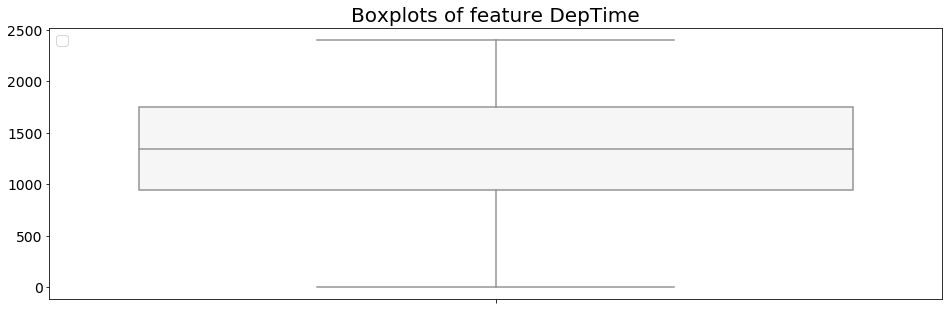

No handles with labels found to put in legend.


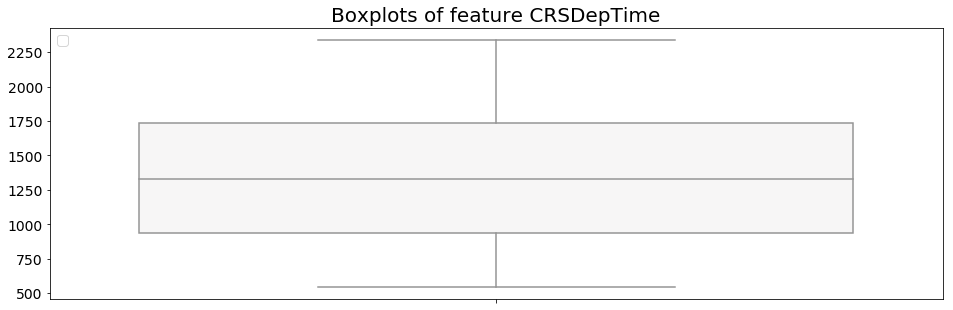

No handles with labels found to put in legend.


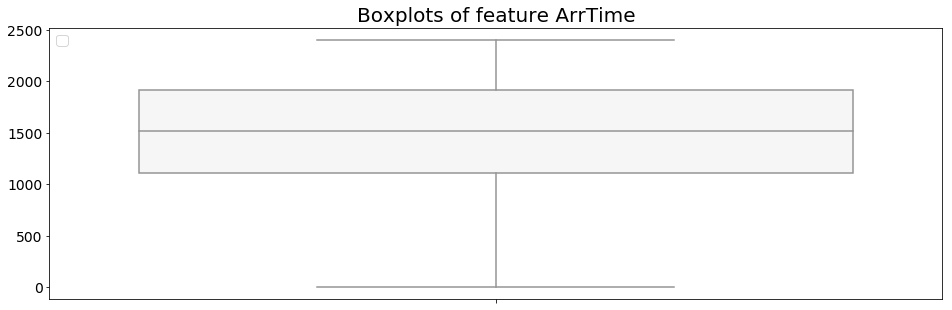

No handles with labels found to put in legend.


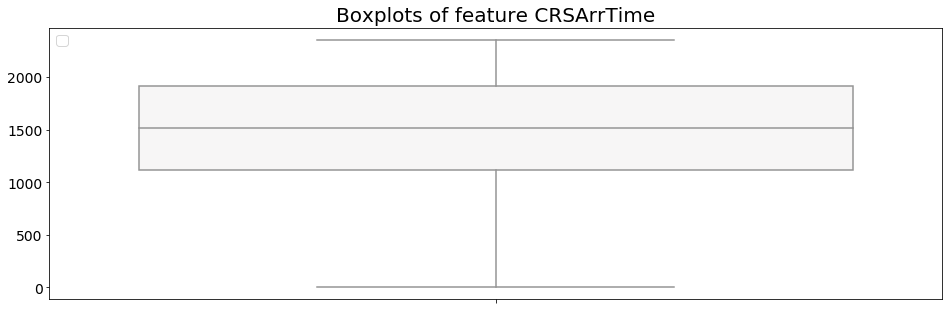

No handles with labels found to put in legend.


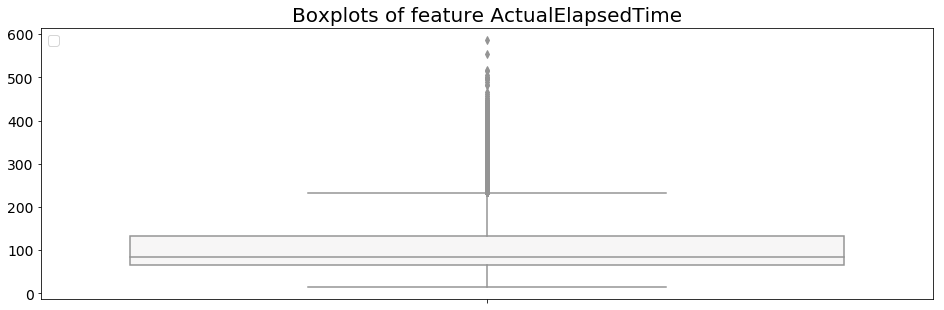

No handles with labels found to put in legend.


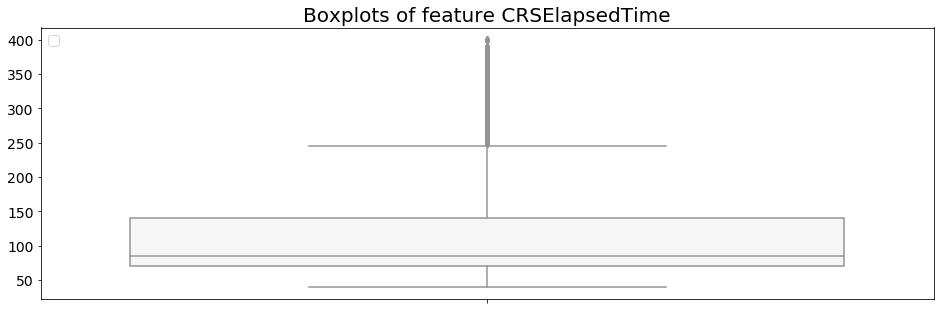

No handles with labels found to put in legend.


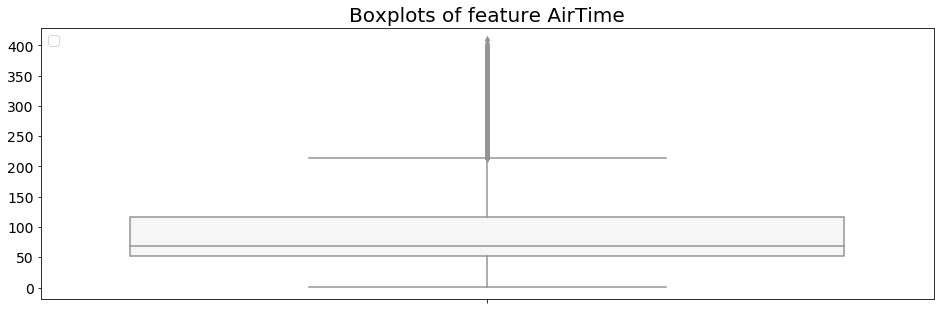

No handles with labels found to put in legend.


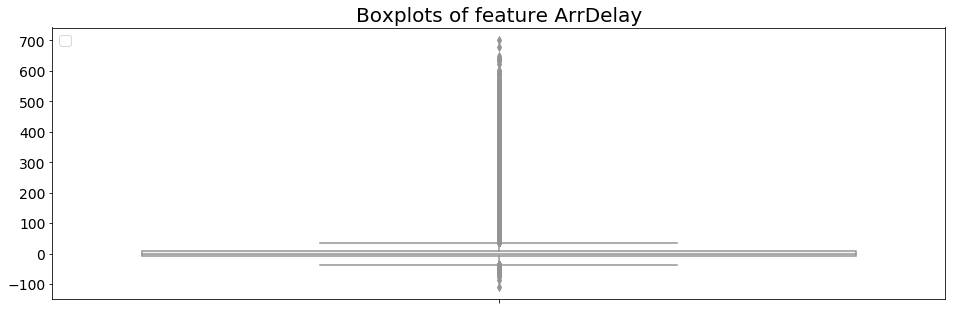

No handles with labels found to put in legend.


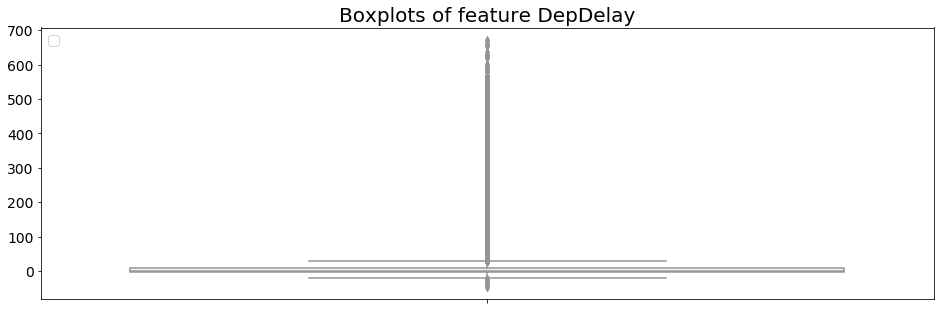

No handles with labels found to put in legend.


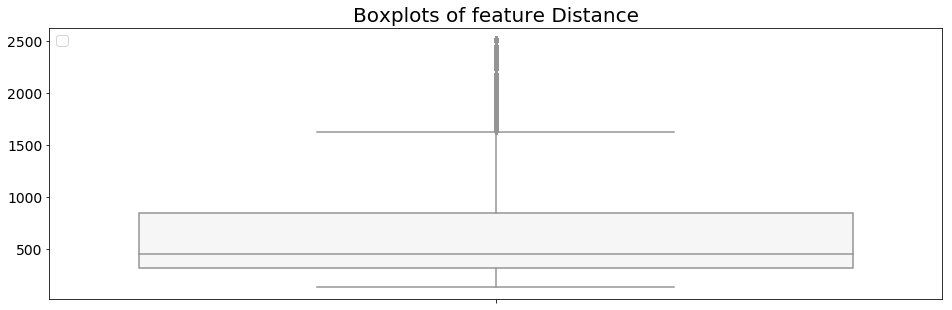

No handles with labels found to put in legend.


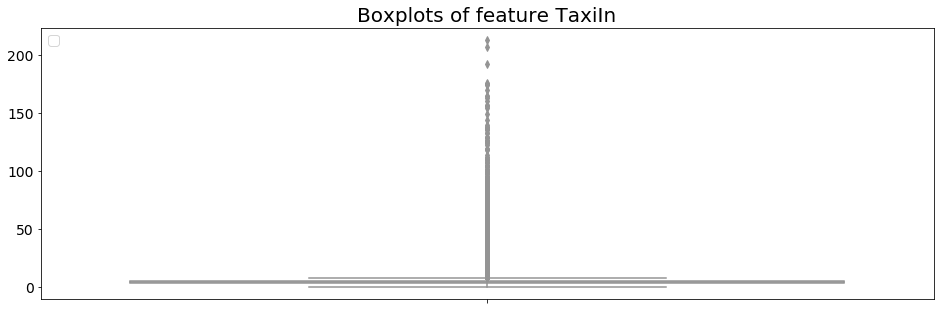

No handles with labels found to put in legend.


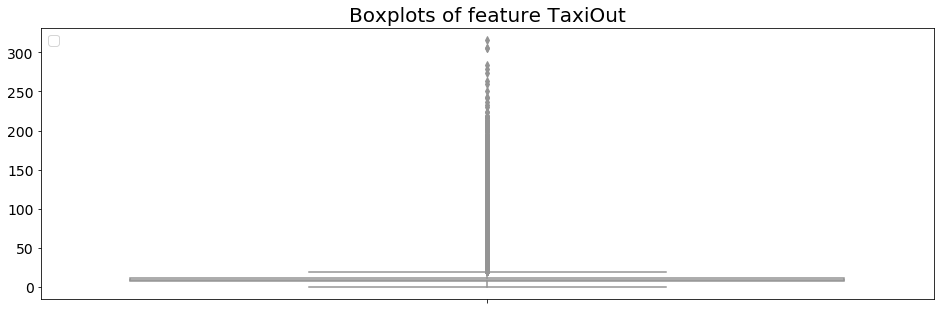

No handles with labels found to put in legend.


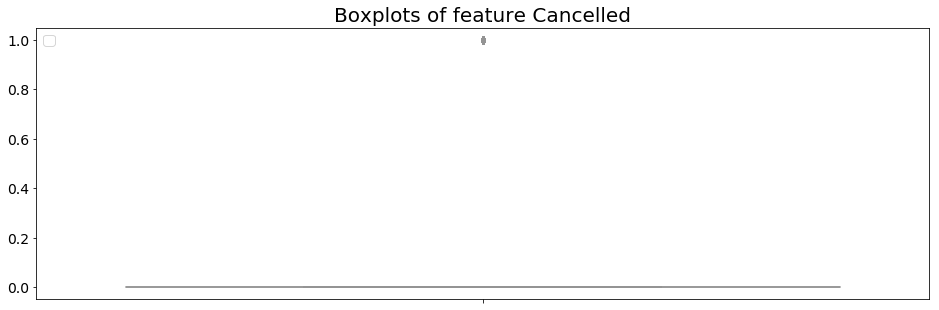

No handles with labels found to put in legend.


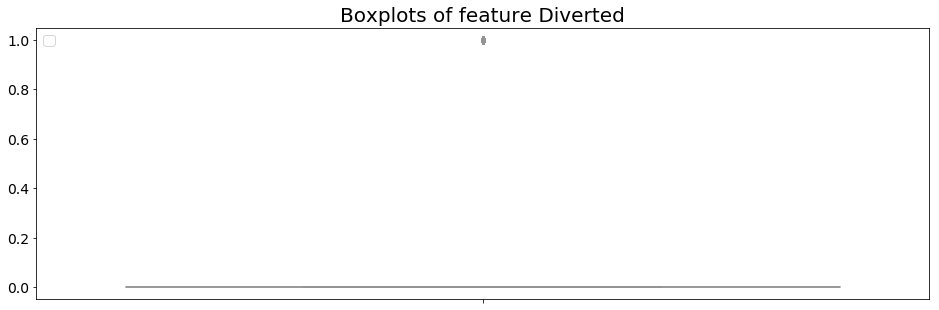

No handles with labels found to put in legend.


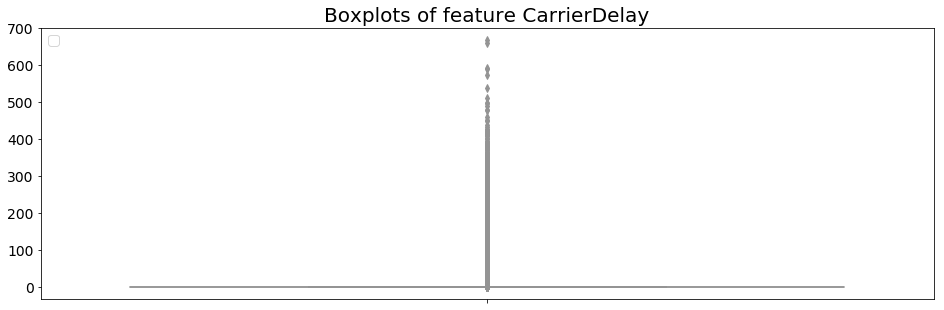

No handles with labels found to put in legend.


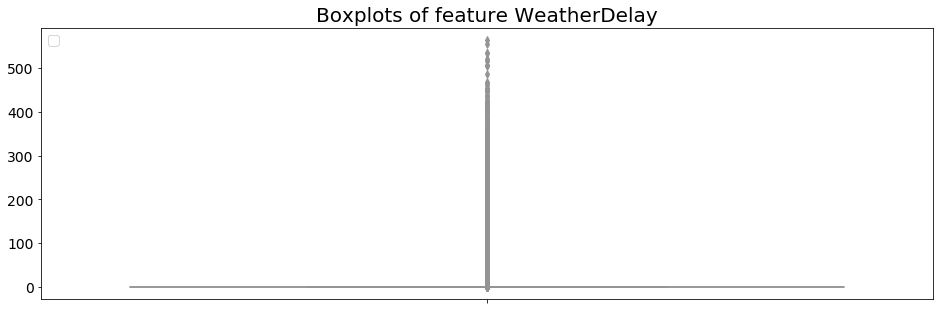

No handles with labels found to put in legend.


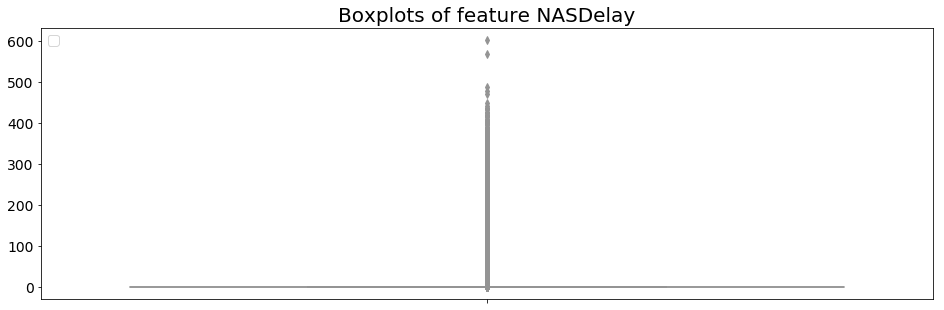

No handles with labels found to put in legend.


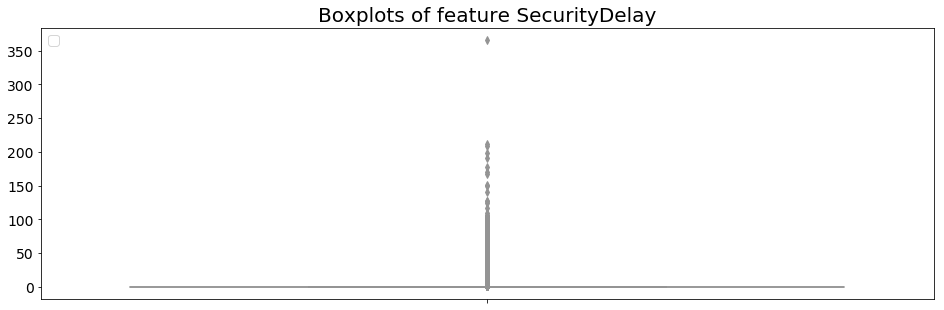

No handles with labels found to put in legend.


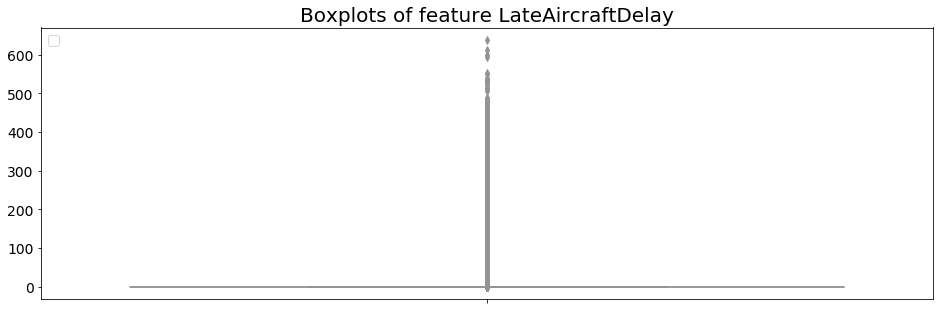

TypeError: cannot perform reduce with flexible type

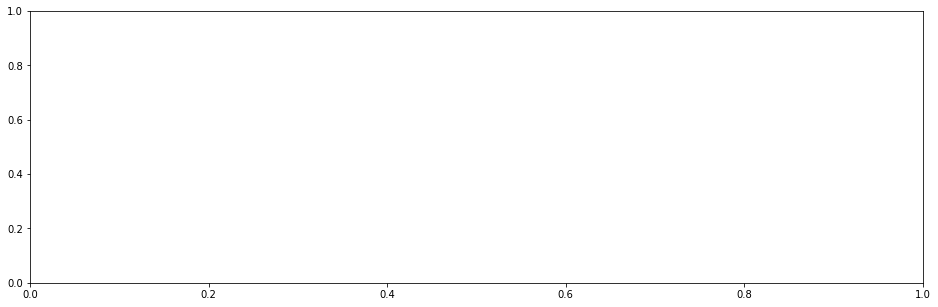

In [6]:
univariate(df)

In [7]:
def bivariate(df):
    
    categorical_columns = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 
                           'UniqueCarrier', 'TailNum', 'FlightNum',
                           'Origin', 'Dest', 'CancellationCode']

    columns_all = df.columns.tolist()         #columns in every dataframe are the same
    columns_keep = set(columns_all) - set(categorical_columns)
    
    cor = df[list(columns_keep)].corr()
    
    fig = plt.figure(figsize=(30, 30))
    hm = sns.heatmap(cor, annot=True, fmt=".2f", cmap='RdBu_r')
    plt.title('Heatmap of features for SowthWest carrier', fontsize=35)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25, rotation=0)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=25)
    plt.show()
    
    cor = df[list(columns_keep)].corr().abs()
    mask = np.zeros_like(cor)
    mask[np.triu_indices_from(mask)] = True
    cor = cor*mask
    np.fill_diagonal(cor.values, -2)
    s = cor.unstack()
    s= s.sort_values(ascending=False)
    df_corr = pd.DataFrame(s, columns=['Correlation'])
    df_corr = df_corr.sort_values(by='Correlation', ascending=False)
    df_corr = df_corr[df_corr['Correlation']>0.7]
    print('Table of features Pearson correlation coefficients (corr > 0.7) for Sowthwest airlines\n')
    print(df_corr)

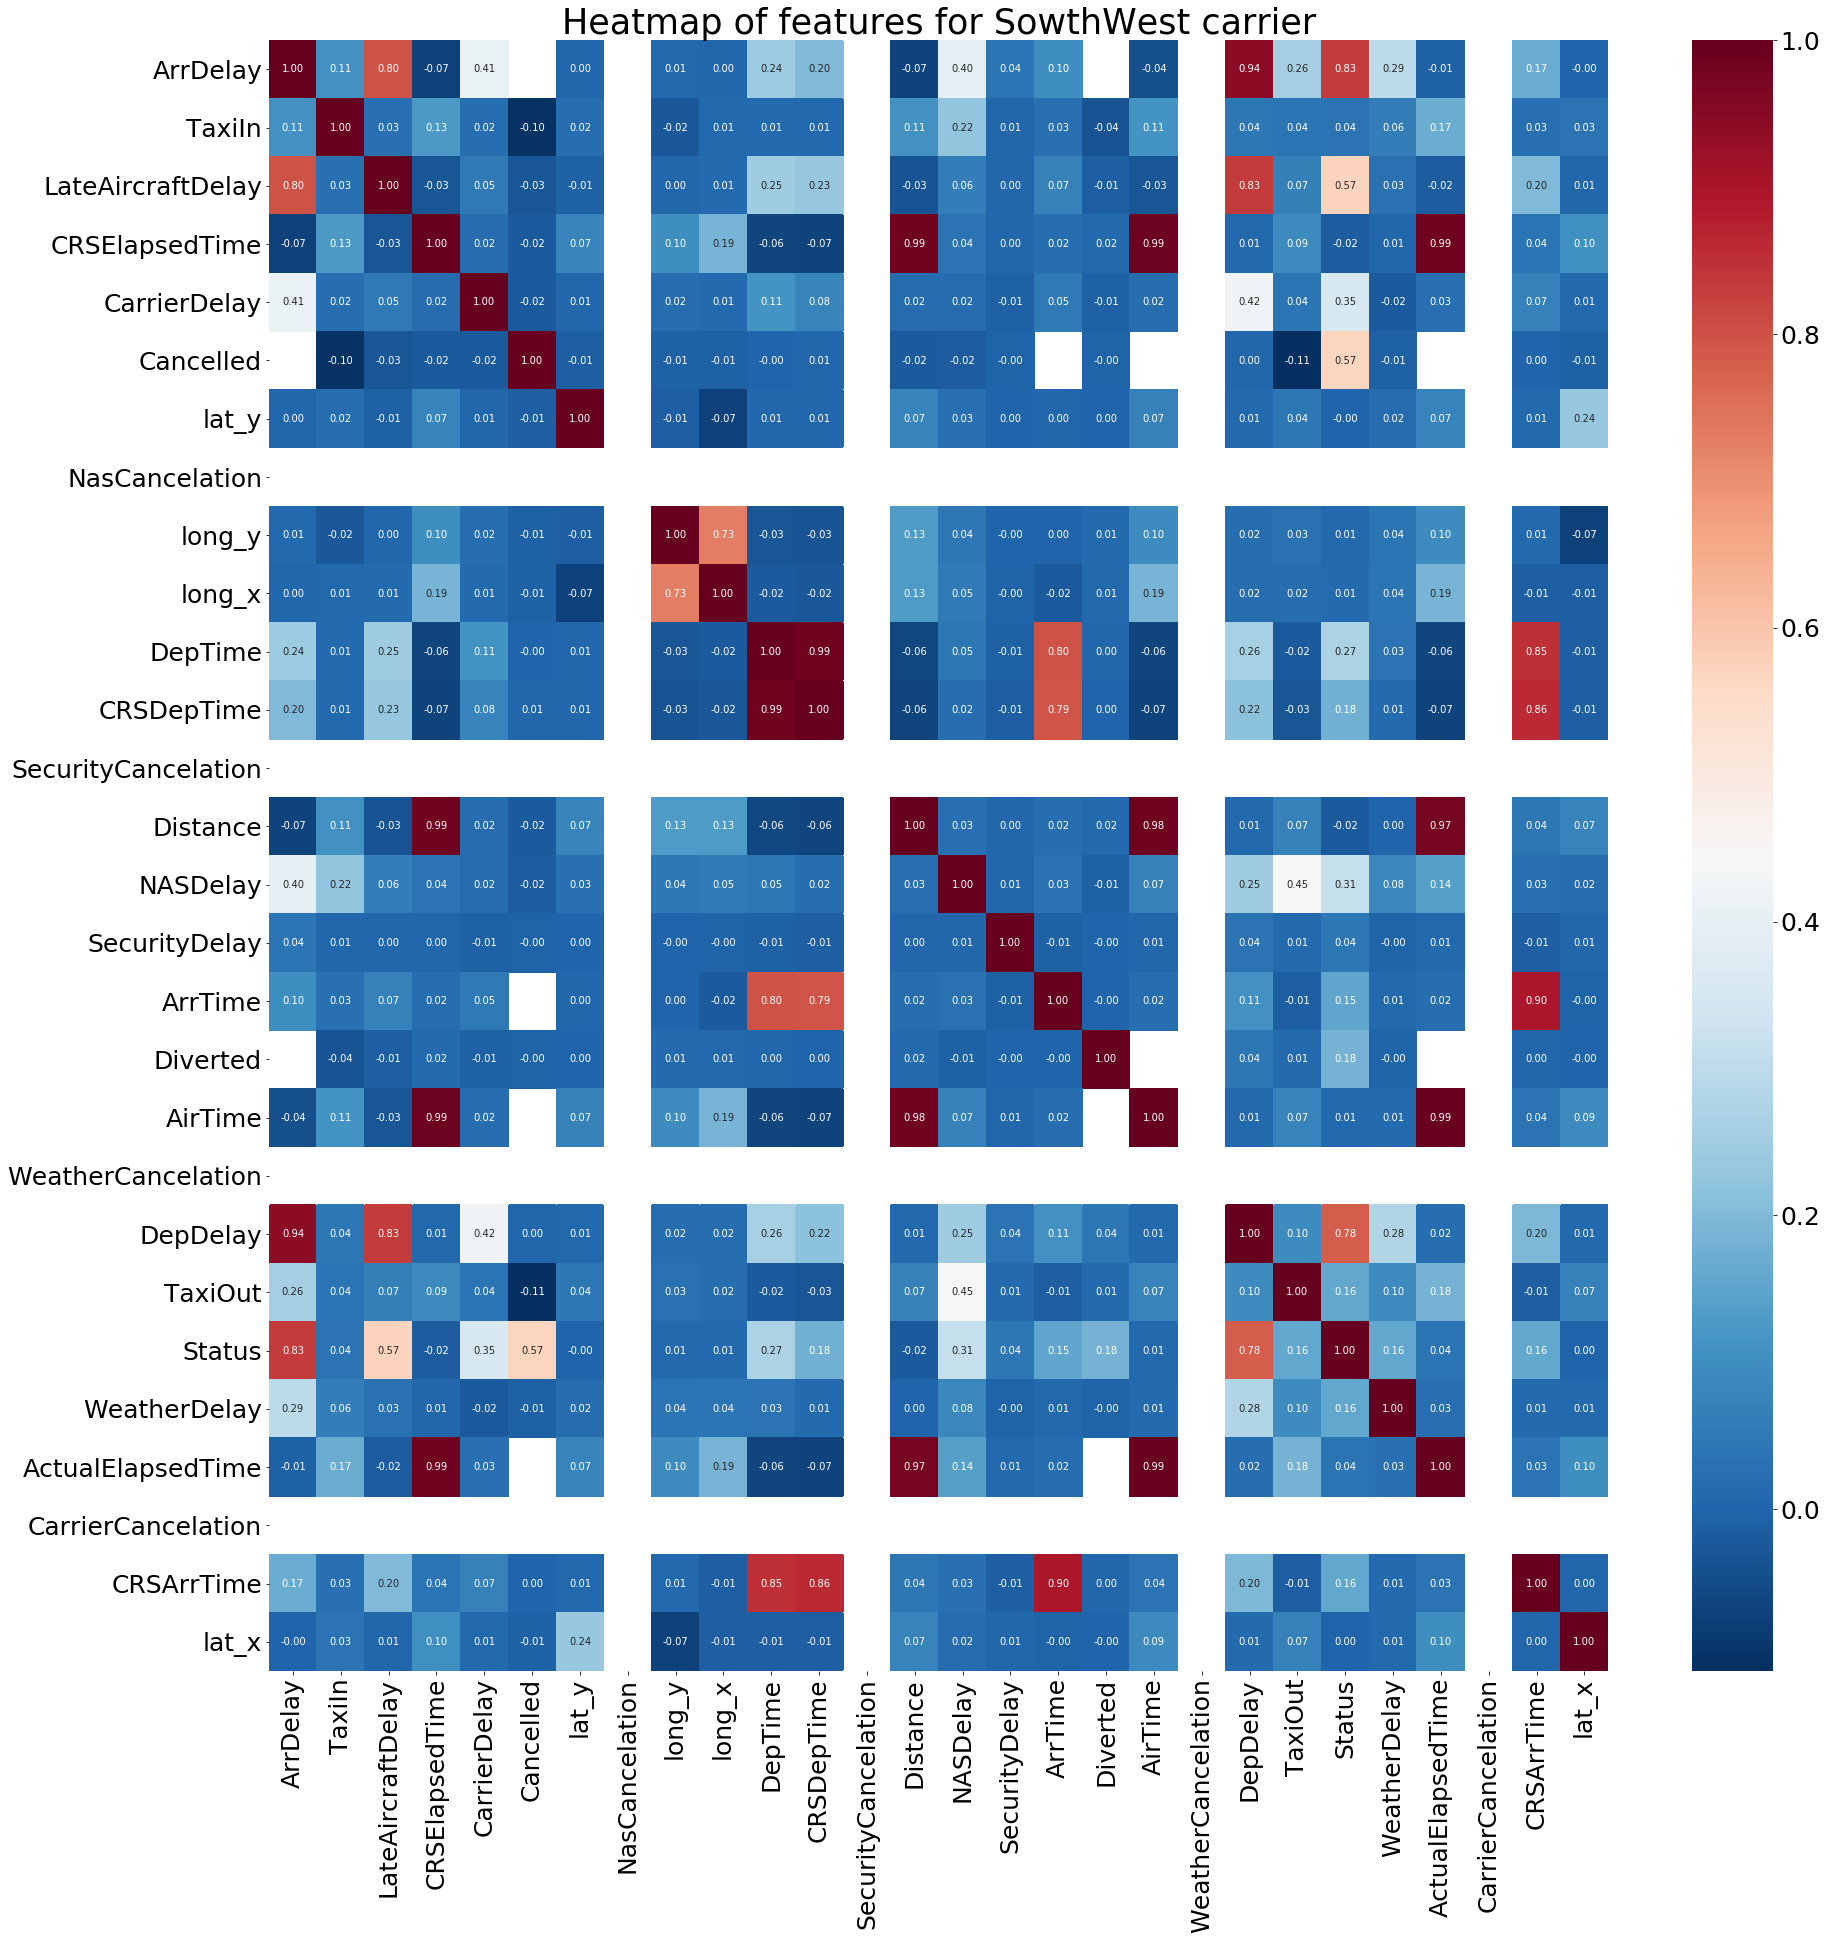

Table of features Pearson correlation coefficients (corr > 0.7) for Sowthwest airlines

                                     Correlation
ActualElapsedTime AirTime               0.992424
AirTime           CRSElapsedTime        0.989919
Distance          CRSElapsedTime        0.985657
ActualElapsedTime CRSElapsedTime        0.985285
CRSDepTime        DepTime               0.985033
AirTime           Distance              0.982743
ActualElapsedTime Distance              0.974709
DepDelay          ArrDelay              0.943280
CRSArrTime        ArrTime               0.897209
                  CRSDepTime            0.860557
                  DepTime               0.848977
Status            ArrDelay              0.832753
DepDelay          LateAircraftDelay     0.831047
LateAircraftDelay ArrDelay              0.798953
ArrTime           DepTime               0.797991
                  CRSDepTime            0.794172
Status            DepDelay              0.782028
long_x            long_y      

In [8]:
bivariate(df)

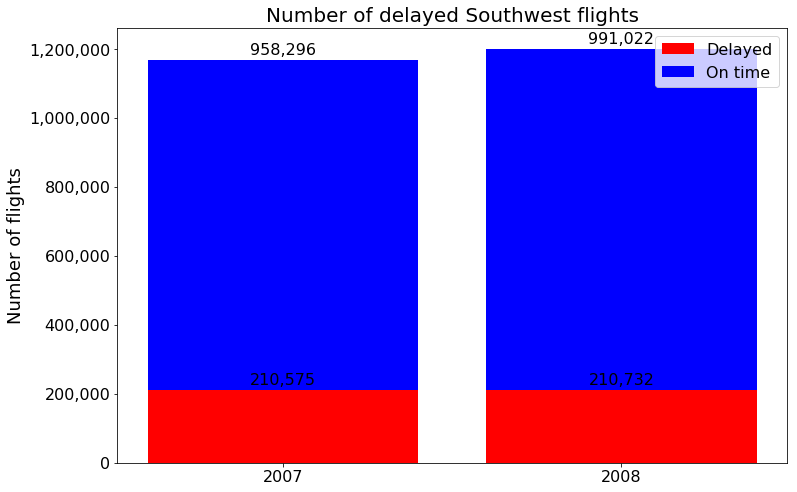

In [9]:
y1 = df[df['ArrDelay']>15][['Year','ArrDelay']].groupby(['Year']).count()
y2 = df[['Year', 'Month']].groupby(['Year']).count()

width = 0.35 

fig = plt.figure(figsize=(12, 8))


p1 = plt.bar(y1.index, y1.values.reshape(len(y1),),color='red')
p2 = plt.bar(y2.index, (y2.values.reshape(len(y1),) - y1.values.reshape(2,)),
             bottom=y1.values.reshape(len(y1),), color='blue')

plt.ylabel('Number of flights', fontsize=18)
plt.title('Number of delayed Southwest flights', fontsize=20)
plt.legend(['Delayed', 'On time'], fontsize=16)
plt.xticks(y1.index,('2007', '2008'), fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 15000, format(int(bar1.get_height()), ','),
                    ha='center', color='black', fontsize=16)
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 15000, format(int(bar2.get_height()), ','),
                    ha='center', color='black', fontsize=16)
    
plt.show()

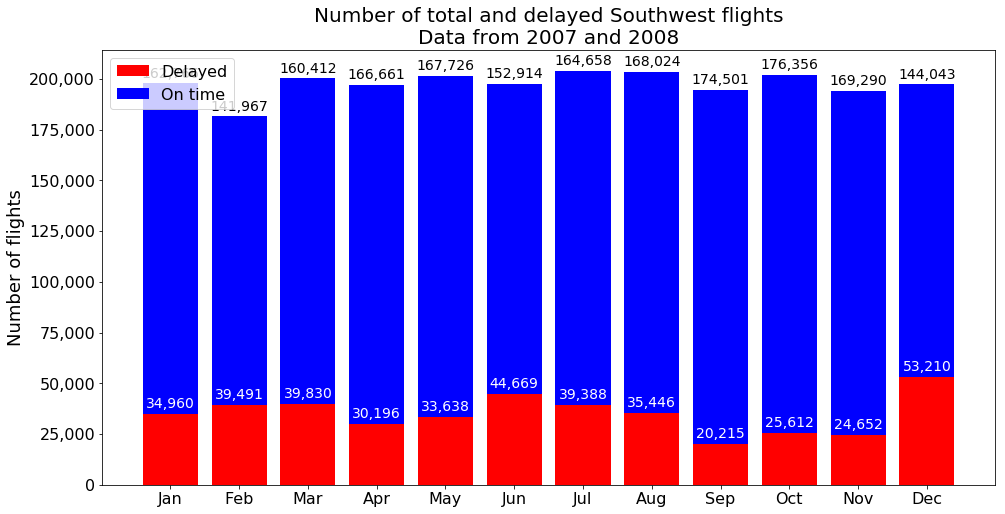

In [10]:
y1 = df[df['ArrDelay']>15][['Month','ArrDelay']].groupby(['Month']).count()
y2 = df[['Year', 'Month']].groupby(['Month']).count()

width = 0.35 

fig = plt.figure(figsize=(16, 8))

Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p1 = plt.bar(y1.index, y1.values.reshape(len(y1),),color='red')
p2 = plt.bar(y2.index, (y2.values.reshape(len(y2),) - y1.values.reshape(len(y1),)),
             bottom=y1.values.reshape(len(y1),), color='blue')

plt.ylabel('Number of flights', fontsize=18)
plt.title('Number of total and delayed Southwest flights\nData from 2007 and 2008', fontsize=20)
plt.legend(['Delayed', 'On time'], fontsize=16)
plt.xticks(y1.index,(Months), fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 3000, format(int(bar1.get_height()), ','),
                    ha='center', color='white', fontsize=14)
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 3000, format(int(bar2.get_height()), ','),
                    ha='center', color='black', fontsize=14)
    i+=1

plt.show()

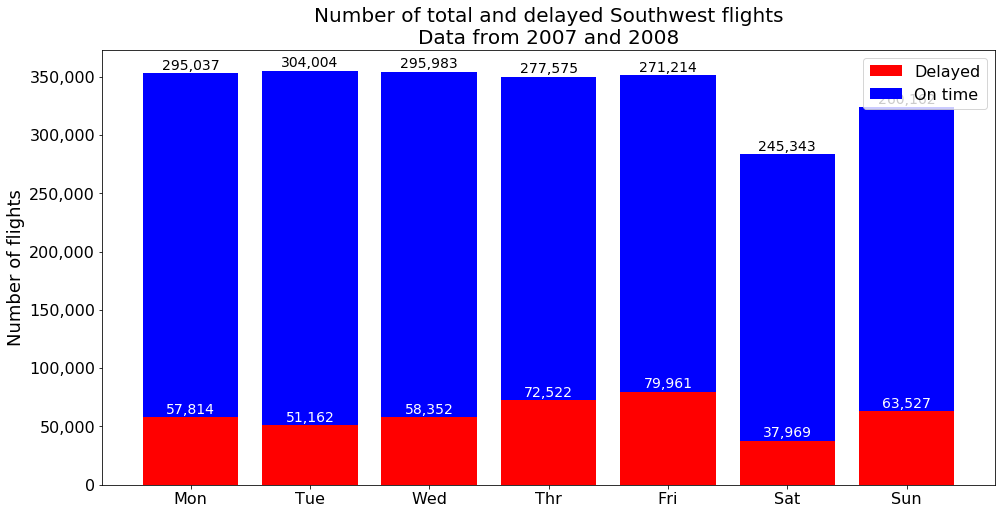

In [11]:
y1 = df[df['ArrDelay']>15][['ArrDelay']].groupby([df[df['ArrDelay']>15].index.dayofweek]).count()
y2 = df[['Month']].groupby([df.index.dayofweek]).count()

width = 0.35 

fig = plt.figure(figsize=(16, 8))

Days = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']

p1 = plt.bar(y1.index, y1.values.reshape(len(y1),),color='red')
p2 = plt.bar(y2.index, (y2.values.reshape(len(y2),) - y1.values.reshape(len(y1),)),
             bottom=y1.values.reshape(len(y1),), color='blue')

plt.ylabel('Number of flights', fontsize=18)
plt.title('Number of total and delayed Southwest flights\nData from 2007 and 2008', fontsize=20)
plt.legend(['Delayed', 'On time'], fontsize=16)
plt.xticks(y1.index,(Days), fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

for bar1 in p1:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 3000, format(int(bar1.get_height()), ','),
                    ha='center', color='white', fontsize=14)
i=0
for bar2 in p2:
    plt.gca().text(bar2.get_x() + bar2.get_width()/2,
                    bar2.get_height() + y1.values[i] + 3000, format(int(bar2.get_height()), ','),
                    ha='center', color='black', fontsize=14)
    i+=1

plt.show()

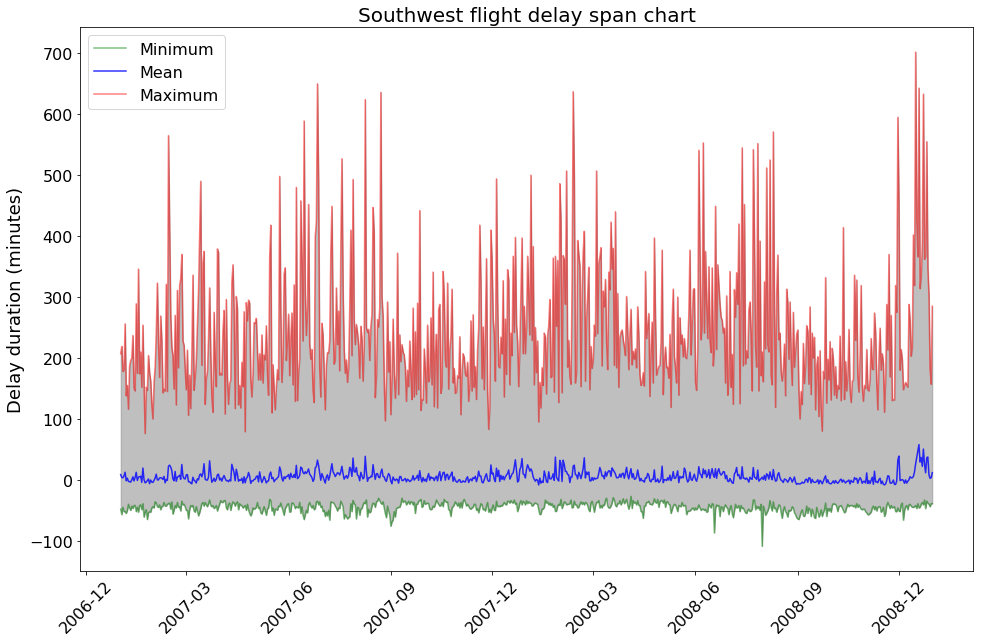

In [12]:
y1 = np.array(df[['ArrDelay']].groupby([df.index]).min()).reshape(731,)
y2 = np.array(df[['ArrDelay']].groupby([df.index]).mean()).reshape(731,)
y3 = np.array(df[['ArrDelay']].groupby([df.index]).max()).reshape(731,)

x = np.unique(df.index.values)

plt.figure(figsize=(16, 10))
plt.plot(x, y1, color='green', alpha=0.5)
plt.plot(x, y2, color='blue', alpha=0.8) 
plt.plot(x, y3, color='red', alpha=0.5)         
plt.fill_between(x, y1, y3, color='grey', alpha=0.5)

plt.ylabel('Delay duration (minutes)', fontsize=18)
plt.title('Southwest flight delay span chart', fontsize=20)
plt.legend(['Minimum', 'Mean', 'Maximum'], loc=2, fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

plt.show()

# Cancelation

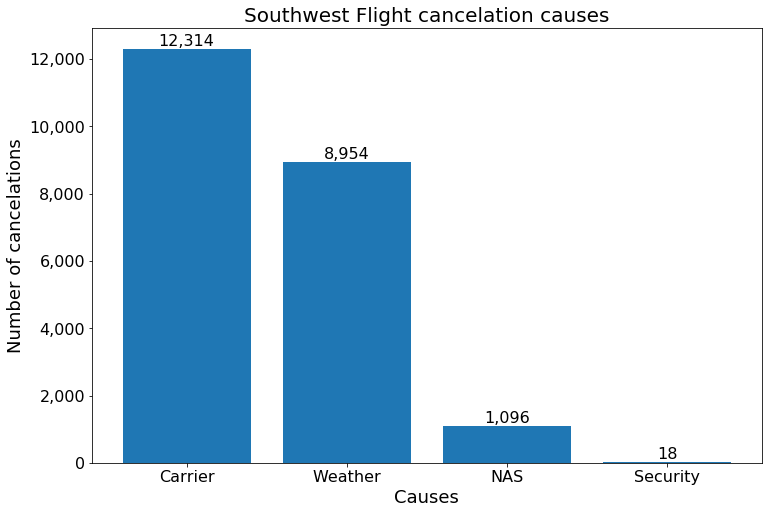

In [13]:
CancFlights = df[(df.Status == 4)]

z = df[['CancellationCode', 'Month']].groupby(['CancellationCode']).count()
codes = ['Carrier', 'Weather', 'NAS', 'Security']
plt.figure(figsize=(12, 8))
#plt.figure(figsize=(12, 8))
ind=np.arange(4)
plt.xticks(ind,(codes), fontsize=16)
p = plt.bar(ind, z.values.reshape(4,))
plt.ylabel('Number of cancelations', fontsize=18)
plt.title('Southwest Flight cancelation causes', fontsize=20)
plt.xlabel('Causes', fontsize=18)
plt.yticks(fontsize=16)
for bar1 in p:
    plt.gca().text(bar1.get_x() + bar1.get_width()/2,
                    bar1.get_height() + 100, format(int(bar1.get_height()), ','),
                    ha='center', color='black', fontsize=16)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

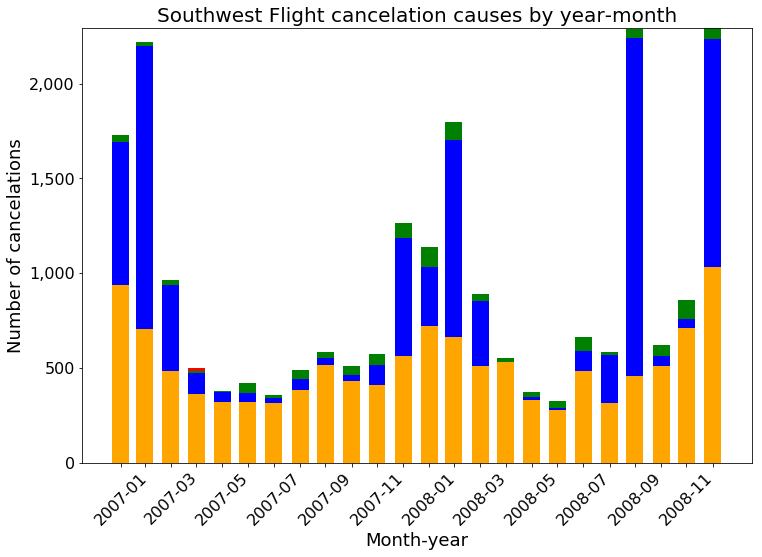

In [14]:
#Could be side-by-side with previous one, previous one could have the same color coding

g = df[['CarrierCancelation','WeatherCancelation', 'NasCancelation', 'SecurityCancelation']].groupby(pd.Grouper(freq="M"))
g = g.sum()

plt.figure(figsize=(12, 8))
b = plt.bar(g.index, g['CarrierCancelation'].values, width=20, color='orange')
b = plt.bar(g.index, g['WeatherCancelation'].values, width=20, bottom=g['CarrierCancelation'].values, color='blue')
b = plt.bar(g.index, g['NasCancelation'].values, width=20, 
            bottom = (g['CarrierCancelation'].values+g['WeatherCancelation'].values), color='green')
b = plt.bar(g.index, g['SecurityCancelation'].values, width=20,
       bottom = (g['CarrierCancelation'].values+g['WeatherCancelation'].values+g['NasCancelation'].values), color='red')
plt.title('Southwest Flight cancelation causes by year-month', fontsize=20)
plt.ylabel('Number of cancelations', fontsize=18)
plt.xlabel('Month-year', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(g.index.values)

for label in ax.get_xaxis().get_ticklabels():
    label.set_visible(False)
    
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(True)

plt.show()

/home/zibski/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/zibski/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


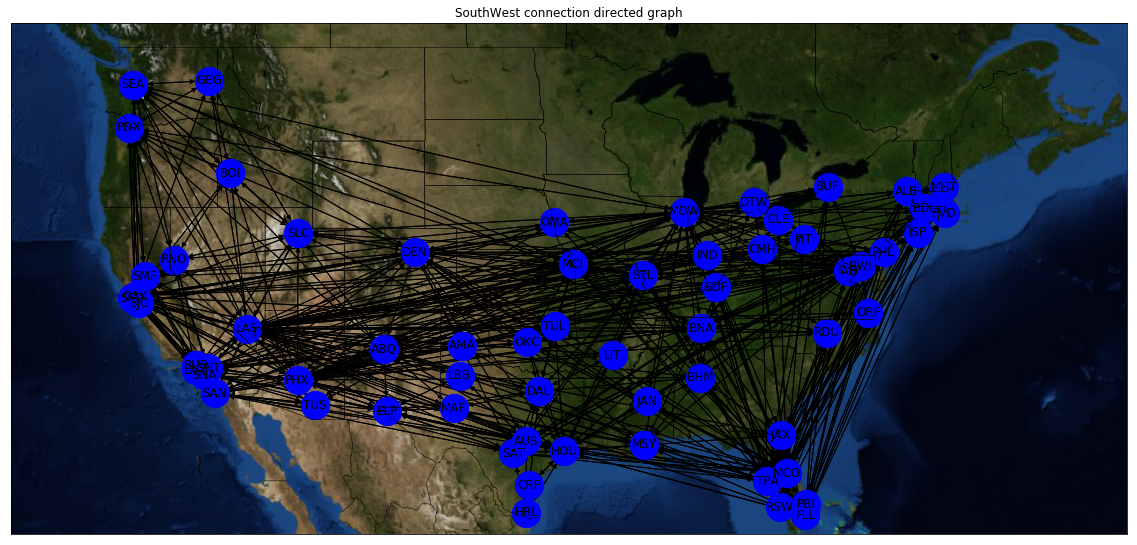

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
m = Basemap(
        projection='merc',
        llcrnrlon=-130,
        llcrnrlat=25,
        urcrnrlon=-60,
        urcrnrlat=50,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

plt.figure(figsize=(20, 20)) 
# The NetworkX part
# put map projection coordinates in pos dictionary
G = nx.DiGraph()
flights = df[['Year', 'Origin', 'Dest']].groupby(['Origin', 'Dest']).count()
flights = [(x[0], x[1], flights.loc[x].values[0]) for x in flights.index]
G.add_weighted_edges_from(flights)

pos=df.set_index('Origin')['lon-lat'].to_dict()
for key, value in pos.items():
    pos[key]=m(value[0], value[1])
# draw
nx.draw_networkx(G,pos,node_size=800,node_color='blue')

# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('SouthWest connection directed graph')
plt.show()

In [16]:
G.edges.data()

OutEdgeDataView([('ABQ', 'AMA', {'weight': 992}), ('ABQ', 'BWI', {'weight': 911}), ('ABQ', 'DAL', {'weight': 5757}), ('ABQ', 'DEN', {'weight': 1453}), ('ABQ', 'ELP', {'weight': 1765}), ('ABQ', 'HOU', {'weight': 2053}), ('ABQ', 'LAS', {'weight': 4727}), ('ABQ', 'LAX', {'weight': 2820}), ('ABQ', 'LBB', {'weight': 731}), ('ABQ', 'MAF', {'weight': 731}), ('ABQ', 'MCI', {'weight': 1385}), ('ABQ', 'MCO', {'weight': 1459}), ('ABQ', 'MDW', {'weight': 1457}), ('ABQ', 'OAK', {'weight': 2073}), ('ABQ', 'PDX', {'weight': 731}), ('ABQ', 'PHX', {'weight': 7337}), ('ABQ', 'SAN', {'weight': 2103}), ('ABQ', 'SEA', {'weight': 1294}), ('ABQ', 'SLC', {'weight': 1131}), ('ABQ', 'STL', {'weight': 731}), ('ABQ', 'TPA', {'weight': 731}), ('ABQ', 'TUS', {'weight': 1439}), ('AMA', 'ABQ', {'weight': 999}), ('AMA', 'DAL', {'weight': 5359}), ('AMA', 'DEN', {'weight': 845}), ('AMA', 'LAS', {'weight': 731}), ('BWI', 'ABQ', {'weight': 914}), ('BWI', 'ALB', {'weight': 4717}), ('BWI', 'AUS', {'weight': 1457}), ('BWI', 

In [23]:
tst = df[['Year', 'Origin', 'Dest']].groupby(['Origin', 'Dest']).count()
flight_counts = tst.rename(columns={'Year': 'Count'},index=str)
flight_counts = flight_counts.reset_index()
flight_counts = flight_counts.sort_values(by='Count', ascending=False)
flight_counts[:10]
#Show 10 most frequent connections

,Origin,Dest,Count
273,HOU,DAL,19424
181,DAL,HOU,19421
401,LAX,OAK,13904
566,OAK,LAX,13869
574,OAK,SAN,12743
747,SAN,OAK,12737
663,PHX,LAS,12706
373,LAS,PHX,12588
560,OAK,BUR,11031
115,BUR,OAK,11025


In [24]:
flight_counts[-10:]
#Shows least frequent connections

,Origin,Dest,Count
818,SLC,MCO,17
485,MCO,SLC,17
475,MCO,OMA,9
907,TUL,MCO,9
487,MCO,TUL,9
590,OMA,MCO,9
474,MCO,OKC,9
585,OKC,MCO,9
652,PHX,BOI,2
103,BOI,PHX,2


In [39]:
df_all['long_x_rad'] = df_all['long_x'].apply(math.radians)
df_all['long_y_rad'] = df_all['long_y'].apply(math.radians)
df_all['lat_x_rad'] = df_all['lat_x'].apply(math.radians)
df_all['lat_y_rad'] = df_all['lat_y'].apply(math.radians)

In [59]:
df_all['distance'] = 2 * np.arctan2(np.sqrt((np.sin((df_all['lat_y_rad'] - df_all['lat_x_rad'])/2)**2 +
                                     np.cos(df_all['lat_x_rad']) * np.cos(df_all['lat_y_rad']) * 
                                     np.sin((df_all['long_y_rad'] - df_all['long_x_rad'])/2)**2)), 
                               np.sqrt(1-(np.sin((df_all['lat_y_rad'] - df_all['lat_x_rad'])/2)**2 +
                                     np.cos(df_all['lat_x_rad']) * np.cos(df_all['lat_y_rad']) * 
                                     np.sin((df_all['long_y_rad'] - df_all['long_x_rad'])/2)**2))) * 6372.0 * 0.621371192

In [60]:
df_all.iloc[1234]

Year                                 2007
Month                                   1
DayofMonth                              2
DayOfWeek                               2
DepTime                              1740
CRSDepTime                           1740
ArrTime                              1830
CRSArrTime                           1840
UniqueCarrier                          WN
FlightNum                              52
TailNum                            N328SW
ActualElapsedTime                      50
CRSElapsedTime                         60
AirTime                                42
ArrDelay                              -10
DepDelay                                0
Origin                                HRL
Dest                                  HOU
Distance                              276
TaxiIn                                  3
TaxiOut                                 5
Cancelled                               0
CancellationCode                      NaN
Diverted                          